## Code to pull pixel brightness values along centerlines

In [39]:
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.pylab as pl
import matplotlib.image as mpimg
import cv2
import pandas as pd    
import PIL

csvpaths = '/home/jukes/Documents/Sample_glaciers/'
basepath = '/media/jukes/jukes1/LS8aws/'
massorsize = "mass"

Grab centerline info and BoxIDs

In [40]:
centerline_df = pd.read_csv(csvpaths+'Boxes_coords_pathrows.csv', sep=',', dtype=str, header=0)
centerline_df = centerline_df.set_index('BoxID')
print(centerline_df.shape)

BoxIDs = list(centerline_df.index)
print(BoxIDs)

centerline_df

(10, 4)
['001', '002', '004', '033', '120', '174', '235', '259', '277', '531']


,midpoint_x,midpoint_y,cline_slope,cline_intercept
BoxID,,,,
001,117.0,164.5,-0.11888111888111888,178.4090909090909
002,468.0,575.5,0.03345070422535211,559.8450704225352
004,500.0,651.0,-0.2899305555555556,795.9652777777778
033,362.5,473.0,-0.006185567010309278,475.24226804123714
120,111.0,148.5,0.055944055944055944,142.2902097902098
174,260.5,344.5,-0.3231939163498099,428.6920152091255
235,177.0,201.0,0.2222222222222222,161.66666666666669
259,215.0,484.0,0.0705521472392638,468.8312883435583
277,144.5,204.0,-0.04891304347826087,211.0679347826087


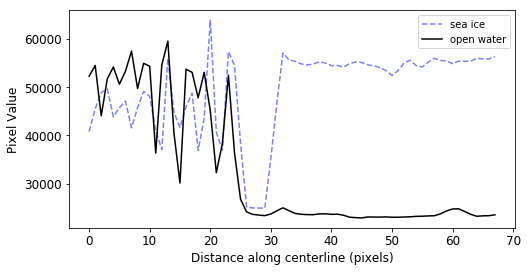

In [38]:
#make lists to store image data and grab image files
ratios = []
imagenames = []

for BoxID in BoxIDs:
    if BoxID == '001':
        imagepath = basepath+"Box"+BoxID+"/resized/"
        #image path
        imgfiles = os.listdir(imagepath)

        #grab terminus box raster
        tbox = mpimg.imread(csvpaths+"Box"+BoxID+"/rotated_images/final/crop_Box"+BoxID+"_raster_cut.png")

        #grab centerline points
        xmin = float(centerline_df.loc[BoxID]['midpoint_x'])
        xmax = np.max(np.array(list(set(np.nonzero(tbox)[0]))))
        c_x = np.linspace(xmin, xmax, int(xmax-xmin))
        c_y = float(centerline_df.loc[BoxID]['cline_slope'])*c_x + float(centerline_df.loc[BoxID]['cline_intercept'])

        #load in each image and grab the pixel values indexed by the centerline points:
        for img in imgfiles:
            if img.endswith(BoxID+'.png') and 'LC80310052013239' in img:

                imagename_pgm = img[:-4]+'.pgm'
                #load in the image using cv2
                image = cv2.imread(imagepath+img,-1)
                imageplt = mpimg.imread(imagepath+img)

                pixelvalues = []
                indexes = []

                #loop through all centerline coordinates
                for i in range(0, len(c_x)):
                    x = int(c_x[i])
                    y = int(c_y[i])
                    pixval = '%.3f' % image[y][x]
                    pixelvalues.append(float(pixval))
                    indexes.append(i)#*15.0)
                    
#                     print(x, y, pixval)

#                 #grab the first and last third
                third = int(len(pixelvalues)/3)
                third1 = pixelvalues[:third]
                third3 = pixelvalues[-third:]
#                 print(third1)
#                 print(third3)
                
                fig, ax1 = plt.subplots(figsize=(8,4))
                plt.plot(seaice_idxs, seaice_pixvals, 'b--', alpha=0.5)
                plt.plot(indexes, pixelvalues, 'k-')
#                 ax1.set_title(img, fontsize=16)
                ax1.set_ylabel('Pixel Value', fontsize=12)
                ax1.set_xlabel('Distance along centerline (pixels)', fontsize=12)
                ax1.tick_params(axis='both', which='major', labelsize=12)
                plt.legend(['sea ice', 'open water'])
                plt.savefig(csvpaths+'Figures/Centerline_values_example_Box001.png', dpi=500)
                plt.show()

                #grab the average of the first and average of the last to compare
                avgthird1 = float(np.average(np.array(third1)))
                avgthird3 = float(np.average(np.array(third3)))
                ratio = "%.2f" % (avgthird1/avgthird3)
                
                ratios.append(ratio)
                imagenames.append(imagename_pgm)
# #                 print('Ratio 1st/3rd:', ratio)
#                 print(img)

#                 plt.figure(figsize=(20,10))
#                 imgplt_trim = plt.imshow(cv2.cvtColor(imageplt, cv2.COLOR_BGR2RGB))
#                 plt.plot(c_x, c_y, '--w', linewidth=1.5, alpha=0.3)
#                 plt.text(int(0.02*image.shape[0]), int(0.035*image.shape[1]), ratio
#                          , fontsize=16, color='w')
#                 plt.show()
        
# pixels_df = pd.DataFrame(list(zip(imagenames, ratios)))
# pixels_df

In [26]:
seaice_pixvals = pixelvalues
seaice_idxs = indexes

In [ ]:
#write to txt file
pixels_df.to_csv(path_or_buf=csvpaths+'Pixelratios.txt', sep=' ', index=False, header=False)